In [31]:
pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout,BatchNormalization
from keras.optimizers  import Adam,RMSprop


train_dir=r'C:\genai_with_gemini\emo_traine\emo_train'
test_dir=r'C:\genai_with_gemini\emo_teste\emo_test'

# Data Augmentation

train_data = ImageDataGenerator(rescale=1./255
)
test_data = ImageDataGenerator(rescale=1./255)

# Load train and test data
train = train_data.flow_from_directory(train_dir, target_size=(48, 48), batch_size=32, class_mode='categorical', color_mode='grayscale')
test = test_data.flow_from_directory(test_dir, target_size=(48, 48), batch_size=32, class_mode='categorical', color_mode='grayscale')
print(train[0][0].shape)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
(32, 48, 48, 1)


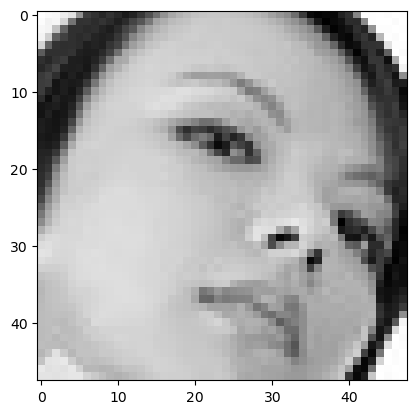

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(train[0][0][0],cmap='gray')
plt.show()

In [3]:
# Define the CNN model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))




# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully Connected Dense Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))


# Output Layer for 7 classes (emotion categories)
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

C:\Users\kaila\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,639 (1.61 MB)

 Trainable params: 421,639 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.fit(train,epochs=10)

Epoch 1/10


C:\Users\kaila\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 93s 99ms/step - accuracy: 0.2341 - loss: 1.8285
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 78s 86ms/step - accuracy: 0.3930 - loss: 1.5675
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 77s 85ms/step - accuracy: 0.4864 - loss: 1.3554
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 55ms/step - accuracy: 0.5352 - loss: 1.2379
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.5655 - loss: 1.1407
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 51s 57ms/step - accuracy: 0.5976 - loss: 1.0777
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 55ms/step - accuracy: 0.6219 - loss: 1.0120
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 52s 57ms/step - accuracy: 0.6417 - loss: 0.9498
Epoch 9/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 52s 57ms/step - accuracy: 0.6652 - loss: 0.8964
Epoch 10/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 51s 57ms/step - accuracy: 0.6801 - loss: 0.8642


In [87]:
test_loss, test_acc = model.evaluate(test)
print("Test accuracy: ", test_acc)

225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5544 - loss: 1.2847
Test accuracy:  0.5562831163406372


In [79]:
pr=model.predict(test[0][0][0])
print(pr)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None